In [78]:
import numpy as np
import pandas as pd

import scipy
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.multicomp import multipletests 

In [2]:
data = pd.read_csv('ab_browser_test.csv')

In [3]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566134 entries, 0 to 566133
Data columns (total 6 columns):
userID              566134 non-null int64
browser             566134 non-null object
slot                566134 non-null object
n_clicks            566134 non-null int64
n_queries           566134 non-null int64
n_nonclk_queries    566134 non-null int64
dtypes: int64(4), object(2)
memory usage: 25.9+ MB


In [5]:
data[['n_clicks', 'n_queries', 'n_nonclk_queries']].describe()

,n_clicks,n_queries,n_nonclk_queries
count,566134.000000,566134.000000,566134.000000
mean,11.431658,10.720524,4.703987
std,20.251494,16.262827,8.109958
min,0.000000,1.000000,0.000000
25%,1.000000,2.000000,1.000000
50%,4.000000,5.000000,2.000000
75%,13.000000,13.000000,6.000000
max,863.000000,665.000000,581.000000


In [124]:
100 * (sum(data[data.slot == 'exp'].n_clicks) - sum(data[data.slot == 'control'].n_clicks)) / sum(data[data.slot == 'control'].n_clicks)

1.6135689824415806

In [7]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [8]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [9]:
exp_click = data[data.slot == 'exp'].n_clicks.values
control_click = data[data.slot == 'control'].n_clicks.values

In [10]:
np.random.seed(0)

exp_click_scores_median = list(map(np.median, get_bootstrap_samples(exp_click, 1000)))
control_click_scores_median = list(map(np.median, get_bootstrap_samples(control_click, 1000)))

print ("95% confidence interval for the n_click median exp users:",  stat_intervals(exp_click_scores_median, 0.05))
print ("95% confidence interval for the n_click median control users:",  stat_intervals(control_click_scores_median, 0.05))

95% confidence interval for the n_click median exp users: [5. 5.]
95% confidence interval for the n_click median control users: [4. 4.]


In [11]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(exp_click_scores_median, control_click_scores_median)))

In [12]:
print ("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [-1. -1.]


In [13]:
np.random.seed(0)

exp_click_scores_mean = list(map(np.mean, get_bootstrap_samples(exp_click, 1000)))
control_click_scores_mean = list(map(np.mean, get_bootstrap_samples(control_click, 1000)))

print ("95% confidence interval for the n_click mean exp users:",  stat_intervals(exp_click_scores_mean, 0.05))
print ("95% confidence interval for the n_click mean control users:",  stat_intervals(control_click_scores_mean, 0.05))

95% confidence interval for the n_click mean exp users: [11.5086867  11.66089388]
95% confidence interval for the n_click mean control users: [11.20795095 11.35742732]


In [14]:
delta_mean_scores = list(map(lambda x: x[1] - x[0], zip(exp_click_scores_mean, control_click_scores_mean)))

In [15]:
print ("95% confidence interval for the difference between mean",  stat_intervals(delta_mean_scores, 0.05))

95% confidence interval for the difference between mean [-0.40475697 -0.19172563]


566134

In [152]:
np.random.seed(0)
n_boot_samples = 500
bootstrap_samples = get_bootstrap_samples(control_click, 500)

In [153]:
bootstrap_samples_mean = list(map(np.mean, bootstrap_samples))

In [154]:
bootstrap_samples_delta = list(map(lambda x, y: sum(np.power(x - y, 2)), bootstrap_samples, bootstrap_samples_mean))

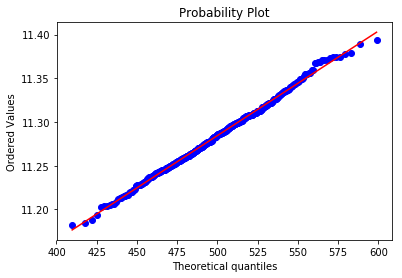

In [155]:
scipy.stats.probplot(bootstrap_samples_mean, dist="chi2", 
                     sparams=(len(bootstrap_samples_mean)-1), plot=plt)
plt.show()

In [157]:
a, b = scipy.stats.probplot(bootstrap_samples_mean, dist="chi2", 
                     sparams=(len(bootstrap_samples_mean)-1), plot=plt)

In [160]:
b

(0.0011968795416019047, 10.686009808530418, 0.9988899574415365)

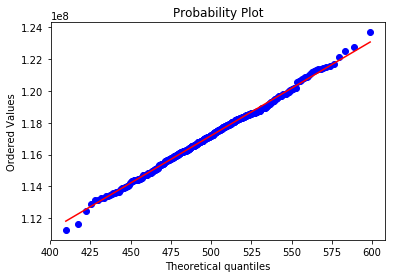

In [156]:
scipy.stats.probplot(bootstrap_samples_delta, dist="chi2", 
                     sparams=(len(bootstrap_samples_delta)-1), plot=plt)
plt.show()

In [161]:
a, b = scipy.stats.probplot(bootstrap_samples_delta, dist="chi2", 
                     sparams=(len(bootstrap_samples_delta)-1), plot=plt)

In [162]:
b

(59433.834691022144, 87471935.62111215, 0.9986416698819759)

In [94]:
#scipy.stats.mannwhitneyu()
exp = data[data.slot == 'exp']
control = data[data.slot == 'control']

In [95]:
exp.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
4,7,Browser #4,exp,54,68,30
6,9,Browser #4,exp,6,3,1


In [96]:
control.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
3,6,Browser #4,control,12,6,0
5,8,Browser #4,control,4,4,1
7,10,Browser #4,control,22,15,2
9,15,Browser #14,control,2,2,0
13,23,Browser #4,control,3,1,0


In [97]:
exp_group = exp[['userID', 'n_clicks']].groupby('userID').sum()

In [98]:
control_group = control[['userID', 'n_clicks']].groupby('userID').sum()

In [99]:
scipy.stats.mannwhitneyu(exp_group['n_clicks'].values, control_group['n_clicks'].values)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

In [100]:
browser_uniq = data['browser'].unique()

In [101]:
exp[exp.browser == browser_uniq[0]]['n_clicks']
matrix = []
for br in browser_uniq:
    stat, p = scipy.stats.mannwhitneyu(exp[exp.browser == br]['n_clicks'].values, control[control.browser == br]['n_clicks'].values)
    matrix.append([br, stat, p])

In [102]:
mannwhitneyu_frame = pd.DataFrame(matrix)
mannwhitneyu_frame.columns = ['browser', 'statistic', 'pvalue']

In [103]:
mannwhitneyu_frame

,browser,statistic,pvalue
0,Browser #2,1.522573e+09,0.027244
1,Browser #4,3.072448e+09,0.407606
2,Browser #14,8.069847e+08,0.000000
3,Browser #17,1.313897e+08,0.037401
4,Browser #20,1.437918e+08,0.453667
5,Browser #22,2.547598e+09,0.257406


In [104]:
reject, p_corrected, a1, a2 = multipletests(mannwhitneyu_frame.pvalue, 
                                            alpha = 0.05/2, 
                                            method = 'holm') 

In [105]:
mannwhitneyu_frame['p_corrected'] = p_corrected
mannwhitneyu_frame['reject'] = reject

In [106]:
mannwhitneyu_frame.head()

,browser,statistic,pvalue,p_corrected,reject
0,Browser #2,1.522573e+09,0.027244,0.136219,False
1,Browser #4,3.072448e+09,0.407606,0.815212,False
2,Browser #14,8.069847e+08,0.000000,0.000000,True
3,Browser #17,1.313897e+08,0.037401,0.149602,False
4,Browser #20,1.437918e+08,0.453667,0.815212,False


In [107]:
mannwhitneyu_frame[mannwhitneyu_frame.reject == True]

,browser,statistic,pvalue,p_corrected,reject
2,Browser #14,806984730.5,0.0,0.0,True


In [115]:
mannwhitneyu_frame[mannwhitneyu_frame.p_corrected > 0.025]

,browser,statistic,pvalue,p_corrected,reject
0,Browser #2,1.522573e+09,0.027244,0.136219,False
1,Browser #4,3.072448e+09,0.407606,0.815212,False
3,Browser #17,1.313897e+08,0.037401,0.149602,False
4,Browser #20,1.437918e+08,0.453667,0.815212,False
5,Browser #22,2.547598e+09,0.257406,0.772217,False


In [86]:
exp_group_browser = exp[['browser', 'n_clicks', 'n_queries', 'n_nonclk_queries']].groupby('browser').sum()

In [91]:
exp_group_browser['proportion_non_click'] = 100 *exp_group_browser['n_nonclk_queries'] / exp_group_browser['n_queries'] 
exp_group_browser.head()

,n_clicks,n_queries,n_nonclk_queries,proportion_non_click
browser,,,,
Browser #14,294556,282606,123656,43.755617
Browser #17,266285,210123,77614,36.937413
Browser #2,560109,548019,246514,44.982747
Browser #20,223212,187283,72998,38.977376
Browser #22,858666,743156,296177,39.853947


In [92]:
control_group_browser = control[['browser', 'n_clicks', 'n_queries', 'n_nonclk_queries']].groupby('browser').sum()

In [93]:
control_group_browser['proportion_non_click'] = 100 * control_group_browser['n_nonclk_queries'] / control_group_browser['n_queries']
control_group_browser.head()

,n_clicks,n_queries,n_nonclk_queries,proportion_non_click
browser,,,,
Browser #14,207229,279998,161252,57.590411
Browser #17,266732,208921,75837,36.299367
Browser #2,565964,566239,260259,45.962747
Browser #20,225897,193752,78548,40.540485
Browser #22,879810,777135,315470,40.593977
